<a href="https://colab.research.google.com/github/kl-air-a/ExperimentalDesign-Exercise/blob/main/Experimental_Design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Intricacy of Experimental Design and Estimating Truth

### Introduction
Imagine you are a scientist in a lab, and you are tasked with finding the best current profile for the formation cycle to get the maximum battery stability (i.e. cycle life) or the minimum capacity fading.
Remember that during the first few charging cycles the solid-electrolyte-interphase (SEI) is formed on the graphite particles, which has a severe impact on the stability of the battery.
We will define different charging current profiles during the first ten cycles using two parameters. (Note that for a real optimization problem in the lab we often have 3, 4, 5 or even more factors / parameters to vary).

In this exercise, we are going to explore three methods for conducting such an experiment.

In this folder, you should find an Excel File called 'LabBook'. Here, you can note down all relevant measurement data. The file: 'helper_functions.py' comprises several python-methods working in the background. If you are interested, you can have a look, but for the purpose of this exercise, you don't need to. Any graphs generated throughout the notebook are saved to the folder 'ResultsGraphs'.

Right now, you know the following about your Experiment:
- There are two variables that you can change in your measurement: Factor 1, called "Current Slope" and Factor 2, called "Current Constant". Their physical meaning is explained in the lecture notes.
- Both your variables can take values between -3 and 3.
- During your measurement, you generate the Output. In our case, we measure the Coulombic Efficiency during the first 100 cycles and take it as a measure of the battery's capacity fading.
- In total, you can perform 20 measurements.
- Your goal is to find a value as small as possible by varying Factor 1 and Factor 2.

Please summarize answers to the questions below, as well as any measurement outcomes or graphs in a protocol,  which you hand in in the end.

Before getting started, here are some remarks about running this Jupyter Notebook:
- Code-Cells can be executed by hitting 'Shift-Enter'.
- The tables can be manipulated (adding and removing lines) by right clicking.
- If any difficulties arise, don't hesitate to ask ChatGPT.
- If this doesn't solve the problem, contact us.


Please run the following code to initialize the Jupyter Notebook:

THIS IS YOUR PARAMETER SPACE : 


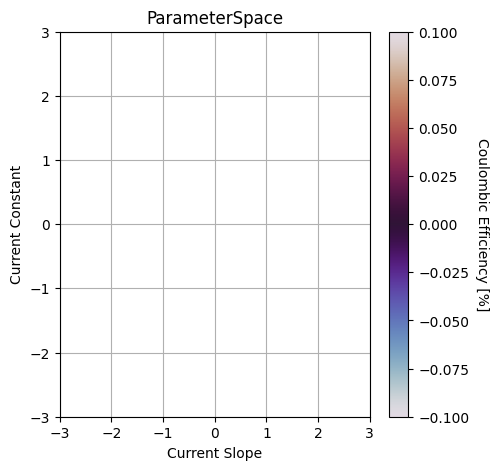

In [1]:
!wget -q "https://raw.githubusercontent.com/kl-air-a/ExperimentalDesign-Exercise/main/helper_functions.py?cachebust=$(date +%s)" -O helper_functions.py
!wget -q "https://github.com/kl-air-a/ExperimentalDesign-Exercise/raw/main/LabBook.xlsx" -O LabBook.xlsx

import sys, importlib
importlib.invalidate_caches()
import helper_functions
importlib.reload(helper_functions)

from helper_functions import *

req()
show_parameter_space()

### Intuitive Approach

1. Think about and write down in the table below, how you would intuitively design the full experiment?
    - What would be your measurement points? Choose at least 6.
    - How can you make sure, you find the optimal value?
Once you have chosen the points, press 'Save to Lab Book'.


In [2]:
table_intuitive()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://eba0793dcffd39286a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


2. Perform your experiment with the method 'lab_measurement' (see below), by giving it the values for the Current Slope and the Current Constant.
    - Write down all results in the table above.
    - Don't forget to save once you're finished.

In [ ]:
_ = lab_measurement(current_slope = 1, current_constant = 1)

3. Once you have conducted all the measurements, try to determine the minimal point of the system by looking at your data? Where would you suspect the minimum to be?
4. Now try to determine the minimum by fitting a quadratic function, with the method 'function_fit'. It accesses all of your datapoints in the table. The method minimize_and_visualize shows your function fit and marks the minimum value of the fit.


In [ ]:
function_type = 'quadratic'
opt, cov, x1, x2 = function_fit(model_function = function_type, sheet = 'Intuitive Approach')
minimize_and_visualize(opt,cov, function_type, 'Intuitive', x1original=x1, x2original = x2)

5. Compare your own minimum point and the point determined by the function fit.
- How much do they differ?
- Is there a way to determine, which one is more accurate?
- What are challenges in both methods?

Let's try a different method:

### Random Sampling

6. In random sampling each of the values is randomly chosen from a normal distribution.
Execute the method 'gimme_random_experiments' as described below. You can find your measurement points in the table and the Excel File 'LabBook.xlsx'.

In [ ]:
gimme_random_experiments(no_of_experiments = 20, sheet = 'Random Sampling')
table_random('Random Sampling')


As you are now already an expert in the lab and have a student assistant who will do all the measurements for you. All you need to do, is execute the next line and select 'Update from LabBook' in the above table.

In [ ]:
read_excel_and_measure('Random Sampling')

6. As above, try to determine the minimal point by hand.
7. As above, fit a function with the method function_fit and determine the minimum value with the function minimize_and_visualize

In [ ]:
function_type = 'quadratic'
opt, cov, x1, x2 = function_fit(model_function = function_type, sheet = 'Random Sampling')
minimize_and_visualize(opt,cov, function_type, 'Random', x1original=x1, x2original = x2)

8. How accurate is your minimal point this time?
9. What could be problems arising from this method?

Now let's try an automatic sequential approach to conducting the measurement.

### Bayesian Optimization

A Bayesian Optimizer is an algorithm, which continuously updates it's knowledge about the measured system.
You start by 'feeding' the algorithm 4 initial datapoints. After that, the algorithm will always tell you, where you should measure next to try and find the optimal setup.  

10. Determine the four initial datapoints by conducting a random sampling.

In [ ]:
gimme_random_experiments(no_of_experiments = 6, sheet = 'Bayesian Optimization')
table_random('Bayesian Optimization')

11. Let your lab helper perform the experiments again. You can find the new values, when pressing 'Update from LabBook' in the table above.

In [ ]:
read_excel_and_measure('Bayesian Optimization')

12. Now you run the bayesian optimizer with the method 'bayesian_optimizer'. It will tell you the next two measurement points, and display it's current state of knowledge about the system in a graph. All the graphs are saved. Note down your next measurement points in the table, press 'Write to Lab Book', and perform the measurement as before. Repeat this, until you have performed all of your 20 experiments.

In [ ]:
bayesian_optimizer(sheet = 'Bayesian Optimization')

13. During the Bayesian Optimization a function is continuously fit to the data. However the used function is not a quadratic one as the examples above. A so called 'Gaussian Process' is used. Gaussian Processes are non-parametric models, which work by estimating a probability distribution for each measurement point. In this way highly irregular patterns can be fitted easily. By passing the function_type 'gpr' to the minimize_and_visualize function, you can see the fit.

In [ ]:
# model_function can be set to: or 'gpr'
function_type = 'gpr'
minimize_and_visualize('Bayesian Optimization', 0 , function_type, 'Bayesian')

#### Conclusion

14. Compare all of your results. Which method gives the lowest minimum value?
15. How far are the results apart?
16. Write down advantages and disadvantages of the three methods including how the fitting function influences the final result.  